# **Insurance Fraud Detection**


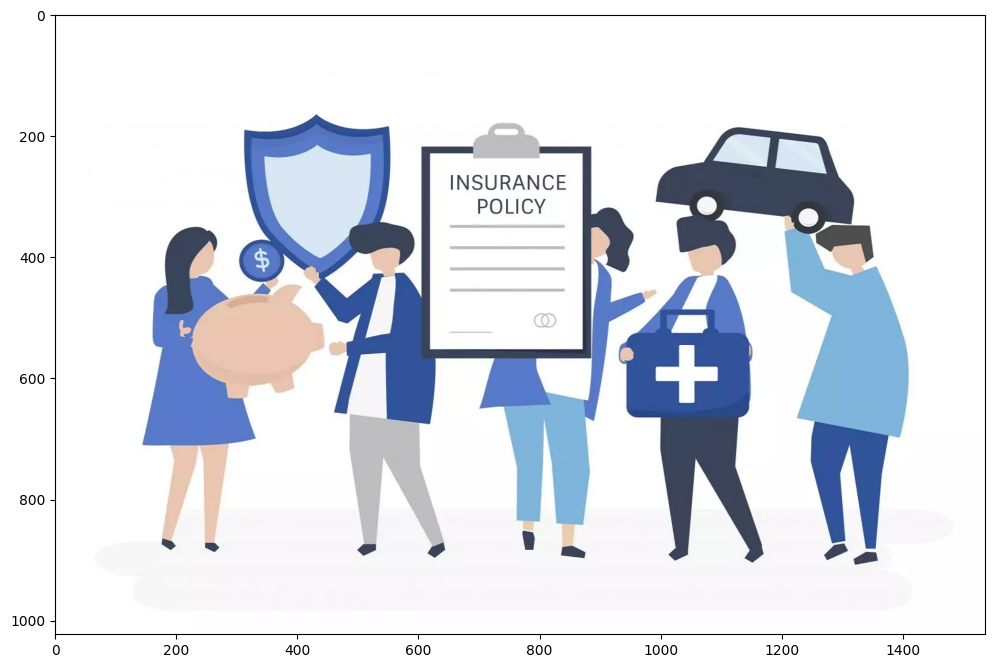

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,20))
img = plt.imread('colab.webp')
plt.imshow(img)

In [ ]:
#Workflow of sci-kit learn
'''
1] setting up data
2] cearting the model
3] training/testing model
4] prediction
'''

'\n1] setting up data\n2] cearting the model\n3] training/testing model\n4] prediction\n'

In [ ]:
#Importing all libraries to be used in it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
#importing model
from sklearn.linear_model import LogisticRegression

In [ ]:
#Importing the accuracy score
from sklearn.metrics import accuracy_score

In [ ]:
# Importing train test split function
from sklearn.model_selection import train_test_split

In [ ]:
#Loading the dataset
df = pd.read_csv('Frauds.csv')
df

,Age,Gender,Insurance_Type,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Policy_Type,Fraudulent_Claim
0,62,Female,Health,15216.58254,131,5733,77,646.464587,Basic,0
1,65,Female,Auto,10000.01000,505,5725,22,976.754644,Basic,0
2,71,Female,Home,14838.51176,907,8067,54,216.533344,Premium,0
3,18,Male,Health,10922.98198,256,9255,28,451.173165,Basic,0
4,21,Male,Health,15372.06416,539,2130,29,288.030168,Basic,0
...,...,...,...,...,...,...,...,...,...,...
9995,47,Male,Health,12111.81445,621,3972,76,413.613751,Premium,0
9996,43,Female,Auto,16282.30209,328,7127,83,580.105727,Standard,0
9997,37,Female,Home,11752.39046,527,2043,10,370.292870,Premium,0
9998,50,Male,Health,16912.39487,673,8611,5,554.253630,Premium,0


In [ ]:
#1st 5 rows
df.head()

,Age,Gender,Insurance_Type,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Policy_Type,Fraudulent_Claim
0,62,Female,Health,15216.58254,131,5733,77,646.464587,Basic,0
1,65,Female,Auto,10000.01000,505,5725,22,976.754644,Basic,0
2,71,Female,Home,14838.51176,907,8067,54,216.533344,Premium,0
3,18,Male,Health,10922.98198,256,9255,28,451.173165,Basic,0
4,21,Male,Health,15372.06416,539,2130,29,288.030168,Basic,0


In [ ]:
#finding the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  int64  
 1   Gender            10000 non-null  object 
 2   Insurance_Type    10000 non-null  object 
 3   Claim_Amount      10000 non-null  float64
 4   Diagnosis_Code    10000 non-null  int64  
 5   Treatment_Code    10000 non-null  int64  
 6   Hospital_Code     10000 non-null  int64  
 7   Doctor_Fee        10000 non-null  float64
 8   Policy_Type       10000 non-null  object 
 9   Fraudulent_Claim  10000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
#Finding no of rows
df.shape

(10000, 10)

In [ ]:
#Finding null values
df.isnull().sum()

Age                 0
Gender              0
Insurance_Type      0
Claim_Amount        0
Diagnosis_Code      0
Treatment_Code      0
Hospital_Code       0
Doctor_Fee          0
Policy_Type         0
Fraudulent_Claim    0
dtype: int64

In [ ]:
#ananlysis of dataset
df.describe()

,Age,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Fraudulent_Claim
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,48.474300,15552.516019,549.010500,5514.909000,50.065900,502.942220,0.050000
std,17.894948,4320.615526,260.200451,2581.418015,28.737772,195.883403,0.217956
min,18.000000,10000.010000,100.000000,1000.000000,1.000000,100.000000,0.000000
25%,33.000000,11802.364330,322.000000,3303.750000,25.000000,364.922353,0.000000
50%,49.000000,15134.045560,549.000000,5529.000000,50.000000,500.420514,0.000000
75%,64.000000,18469.750642,776.000000,7760.000000,75.000000,636.865057,0.000000
max,79.000000,35363.897860,999.000000,9998.000000,99.000000,1270.404034,1.000000


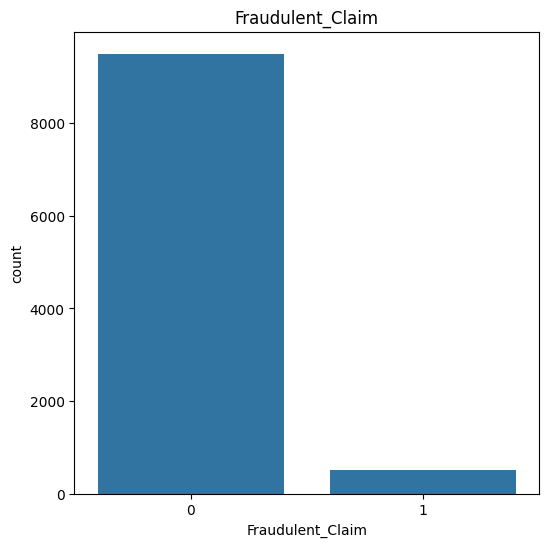

In [ ]:
#Fraud Reported column column
plt.figure(figsize = (6,6))
sns.countplot(x='Fraudulent_Claim',data=df)
plt.title("Fraudulent_Claim")
plt.show()

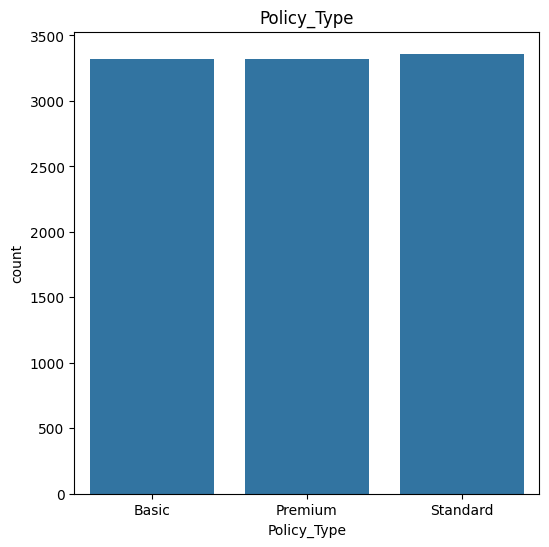

In [ ]:
#policy Distribution column
plt.figure(figsize = (6,6))
sns.countplot(x='Policy_Type',data=df)
plt.title("Policy_Type")
plt.show()

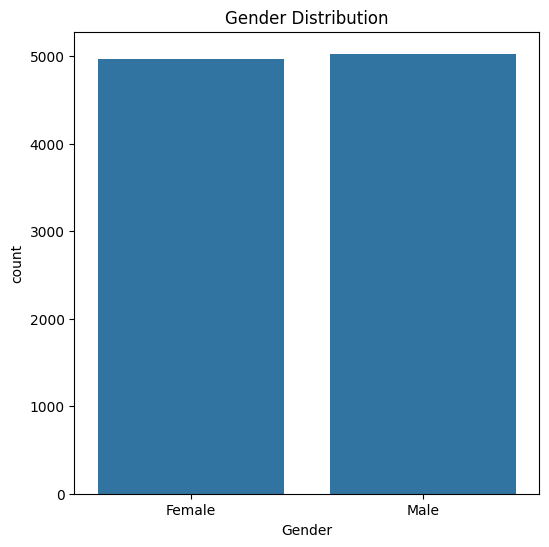

In [ ]:
#Gender Distribution

plt.figure(figsize = (6,6))
sns.countplot(x='Gender',data=df)
plt.title("Gender Distribution")
plt.show()

In [ ]:
# prompt: code to convert Gender column values as Male = 0, Female=1

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# prompt: code to convert Insurance_Type column values as Auto = 0, Health=1, Home=2

df['Insurance_Type'] = df['Insurance_Type'].map({'Auto': 0, 'Health': 1, 'Home': 2})

# prompt: code to convert Policy_Type column values as Standard = 0, Basic=1, Premium=2

df['Policy_Type'] = df['Policy_Type'].map({'Standard': 0, 'Basic': 1, 'Premium': 2})



In [ ]:
#Find no. of Fraud
df['Fraudulent_Claim'].value_counts()

Fraudulent_Claim
0    9500
1     500
Name: count, dtype: int64

In [ ]:
#Seperating input feature as well as the label
to_drop=['Fraudulent_Claim']
X = df.drop(to_drop,axis=1)
Y = df['Fraudulent_Claim'] #Label

In [ ]:
print(X)

      Age  Gender  Insurance_Type  Claim_Amount  Diagnosis_Code  \
0      62       1               1   15216.58254             131   
1      65       1               0   10000.01000             505   
2      71       1               2   14838.51176             907   
3      18       0               1   10922.98198             256   
4      21       0               1   15372.06416             539   
...   ...     ...             ...           ...             ...   
9995   47       0               1   12111.81445             621   
9996   43       1               0   16282.30209             328   
9997   37       1               2   11752.39046             527   
9998   50       0               1   16912.39487             673   
9999   30       0               2   12694.68238             367   

      Treatment_Code  Hospital_Code  Doctor_Fee  Policy_Type  
0               5733             77  646.464587            1  
1               5725             22  976.754644            1  
2     

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Fraudulent_Claim, Length: 10000, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, Y_test.shape)

(10000, 9) (8000, 9) (2000,)


In [ ]:
model = LogisticRegression()

In [ ]:
#Fit the model
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#Model Evaluation
#Accuracy score for training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy score of training data",training_data_accuracy)

Accuracy score of training data 0.951


In [ ]:
#Model Evaluation
#Accuracy score for testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy score of testing data",testing_data_accuracy)

Accuracy score of testing data 0.946


In [ ]:
#Building a Predictive System for Fraud Detection
input_data = (65,1,0,10000.01,505,5725,22,967.7546,1)
#Chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#Reshape the np array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = model.predict(input_data_reshaped)
if prediction == 0:
  print("Fraud Not Detected")
else:
  print("Fraud Detected")

Fraud Not Detected


In [ ]:
#Building a Predictive System for Fraud Detection
input_data = (65,1,1,10000.01,505,5725,22,967.7546,1)
#Chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#Reshape the np array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = model.predict(input_data_reshaped)
if prediction == 0:
  print("Fraud Detected")
else:
  print("Fraud Not Detected")

Fraud Detected
